In [1]:
import collections
import inspect

import numpy as np
import pandas as pd

import graphiclog

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/administrator/code/python/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'sequence',
  'utils',
  'wentworth'])

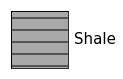

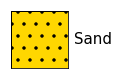

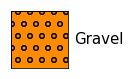

In [3]:
graphiclog.defaults.litholegend.plot()

In [4]:
transforms = {c : graphiclog.utils.string2array for c in ['depth_m', 'grain_size_mm']}

beds = pd.read_csv('../data/AllBedsWithProfiles.csv', converters=transforms)
beds.head()

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.81684,0.31082,0.115051,1.0,0.116073,0.117046,0.520514,0.021978,"[22.81684, 22.70297, 22.53372, 22.50602]","[0.115051, 0.1157124, 0.1170462, 0.1170462]"
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.50602,0.60931,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[22.50602, 21.89671]","[0.001, 0.001]"
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.89671,0.10463,0.125380,1.0,0.125380,0.125380,0.520514,0.021978,"[21.89671, 21.79208]","[0.1253796, 0.1253796]"
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.79208,0.11694,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.79208, 21.67514]","[0.001, 0.001]"
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.67514,0.13232,0.134306,1.0,0.150073,0.160420,0.520514,0.021978,"[21.67514, 21.63514, 21.56744, 21.54282]","[0.1343059, 0.1446953, 0.1604199, 0.1604199]"


In [5]:
for i, (name, grp) in enumerate(beds.groupby('name')):
    if i == 0:
        continue
    if i > 1:
        break
        
    grp['grain_size_psi'] = grp['grain_size_mm'].apply(graphiclog.wentworth.gs2psi)
    
    bedseq = graphiclog.BedSequence.from_dataframe(grp, topcol='tops', thickcol='th',
                                         component_map=graphiclog.defaults.DEFAULT_COMPONENT_MAP,
                                         datacols=['th', 'mean_gs_mm', 'depth_m', 'grain_size_psi'],
                                         metacols=['name', 'collection', 'eod', 'eodnum'])
    
    print(bedseq.values, bedseq.metadata)
    

[[ 1.32920000e-01  1.74892175e-01  8.17069500e+01 -2.75982002e+00]
 [ 1.32920000e-01  1.74892175e-01  8.17647400e+01 -2.52076033e+00]
 [ 1.32920000e-01  1.74892175e-01  8.18109700e+01 -2.39084493e+00]
 ...
 [ 3.87190000e-01  1.25036885e-01  1.49239100e+02 -3.04440984e+00]
 [ 3.87190000e-01  1.25036885e-01  1.49470300e+02 -2.37946464e+00]
 [ 3.87190000e-01  1.25036885e-01  1.49504900e+02 -2.37946464e+00]] {'name': 'Amazon 936A', 'collection': 'Amazon', 'eod': 'fan', 'eodnum': 1}


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/administrator/code/python/graphiclog/graphiclog/sequence.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['base'] = df[topcol] + df[thickcol]


In [6]:
beds[beds.name == 'Amazon 936A']

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm
3030,Amazon 936A,64,Amazon,fan,1,81.70695,0.13292,0.147643,1.0,0.174892,0.190671,0.32356,0.064516,"[81.70695, 81.76474, 81.81097, 81.83987]","[0.1476425, 0.1742511, 0.1906707, 0.1906707]"
3031,Amazon 936A,64,Amazon,fan,1,81.83987,0.50854,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[81.83987, 82.34841]","[0.001, 0.001]"
3032,Amazon 936A,64,Amazon,fan,1,82.34841,0.39297,0.001000,1.0,0.173817,0.205513,0.32356,0.064516,"[82.34841, 82.40042, 82.72404, 82.74138]","[0.001, 0.1675113, 0.2055128, 0.2055128]"
3033,Amazon 936A,64,Amazon,fan,1,82.74138,0.39874,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[82.74138, 83.14012]","[0.001, 0.001]"
3034,Amazon 936A,64,Amazon,fan,1,83.14012,1.54875,0.001000,1.0,0.183639,0.205513,0.32356,0.064516,"[83.14012, 83.16324, 83.19791, 84.6253, 84.68887]","[0.001, 0.00896374, 0.1701749, 0.2055128, 0.20..."
3035,Amazon 936A,64,Amazon,fan,1,84.68887,0.19070,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[84.68887, 84.87957]","[0.001, 0.001]"
3036,Amazon 936A,64,Amazon,fan,1,84.87957,0.48543,0.001000,0.0,0.031281,0.186946,0.32356,0.064516,"[84.87957, 85.04138, 85.23786, 85.34766, 85.365]","[0.001, 0.001075826, 0.00918273, 0.1869462, 0...."
3037,Amazon 936A,64,Amazon,fan,1,85.36500,0.04623,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[85.365, 85.41123]","[0.001, 0.001]"
3038,Amazon 936A,64,Amazon,fan,1,85.41123,0.09824,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[85.41123, 85.50947]","[0.001, 0.001]"
3039,Amazon 936A,64,Amazon,fan,1,85.50947,0.26582,0.001000,0.0,0.001000,0.001000,0.32356,0.064516,"[85.50947, 85.77529]","[0.001, 0.001]"


In [7]:
len(bedseq), bedseq.nsamples, bedseq.nfeatures

(93, 333, 4)

In [8]:
np.log2(1e-3)

-9.965784284662087

In [9]:
bedseq[0]

Interval({'data': {'th': 0.132919999999999, 'mean_gs_mm': 0.174892174847451, 'depth_m': array([81.70695, 81.76474, 81.81097, 81.83987]), 'grain_size_psi': array([-2.75982002, -2.52076033, -2.39084493, -2.39084493])}, 'top': Position({'middle': 81.70695, 'units': 'm'}), 'base': Position({'middle': 81.83987, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'sand'})]})

In [10]:
bedseq[0].values

array([[ 0.13292   ,  0.17489217, 81.70695   , -2.75982002],
       [ 0.13292   ,  0.17489217, 81.76474   , -2.52076033],
       [ 0.13292   ,  0.17489217, 81.81097   , -2.39084493],
       [ 0.13292   ,  0.17489217, 81.83987   , -2.39084493]])

In [11]:
bedseq[0].resample_data('depth_m', 0.01, kind='cubic')
bedseq[0]

Interval({'data': {'th': array([0.13292, 0.13292, 0.13292, 0.13292, 0.13292, 0.13292, 0.13292,
       0.13292, 0.13292, 0.13292, 0.13292, 0.13292, 0.13292]), 'mean_gs_mm': array([0.17489217, 0.17489217, 0.17489217, 0.17489217, 0.17489217,
       0.17489217, 0.17489217, 0.17489217, 0.17489217, 0.17489217,
       0.17489217, 0.17489217, 0.17489217]), 'depth_m': array([81.70695   , 81.71802667, 81.72910333, 81.74018   , 81.75125667,
       81.76233333, 81.77341   , 81.78448667, 81.79556333, 81.80664   ,
       81.81771667, 81.82879333, 81.83987   ]), 'grain_size_psi': array([-2.75982002, -2.71632011, -2.6700977 , -2.62266509, -2.5755346 ,
       -2.53021856, -2.48822926, -2.45107904, -2.42028019, -2.39734504,
       -2.38378591, -2.3811151 , -2.39084493])}, 'top': Position({'middle': 81.70695, 'units': 'm'}), 'base': Position({'middle': 81.83987, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'sand'})]})

In [12]:
bedseq.min_field('grain_size_psi'), bedseq.max_field('grain_size_psi')

(-9.965784284662087, -1.7419698352125612)

In [13]:
bedseq[0].values

array([[ 0.13292   ,  0.17489217, 81.70695   , -2.75982002],
       [ 0.13292   ,  0.17489217, 81.71802667, -2.71632011],
       [ 0.13292   ,  0.17489217, 81.72910333, -2.6700977 ],
       [ 0.13292   ,  0.17489217, 81.74018   , -2.62266509],
       [ 0.13292   ,  0.17489217, 81.75125667, -2.5755346 ],
       [ 0.13292   ,  0.17489217, 81.76233333, -2.53021856],
       [ 0.13292   ,  0.17489217, 81.77341   , -2.48822926],
       [ 0.13292   ,  0.17489217, 81.78448667, -2.45107904],
       [ 0.13292   ,  0.17489217, 81.79556333, -2.42028019],
       [ 0.13292   ,  0.17489217, 81.80664   , -2.39734504],
       [ 0.13292   ,  0.17489217, 81.81771667, -2.38378591],
       [ 0.13292   ,  0.17489217, 81.82879333, -2.3811151 ],
       [ 0.13292   ,  0.17489217, 81.83987   , -2.39084493]])

[[ 0.         81.70695   ]
 [-2.75982002 81.70695   ]
 [-2.71632011 81.71802667]
 [-2.6700977  81.72910333]
 [-2.62266509 81.74018   ]
 [-2.5755346  81.75125667]
 [-2.53021856 81.76233333]
 [-2.48822926 81.77341   ]
 [-2.45107904 81.78448667]
 [-2.42028019 81.79556333]
 [-2.39734504 81.80664   ]
 [-2.38378591 81.81771667]
 [-2.3811151  81.82879333]
 [-2.39084493 81.83987   ]
 [ 0.         81.83987   ]
 [ 0.         81.70695   ]]


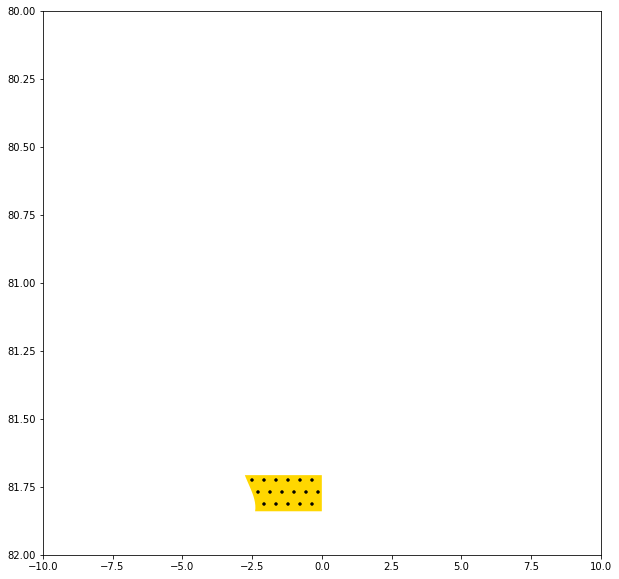

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

test_poly = bedseq[0].as_patch(graphiclog.defaults.litholegend, 'grain_size_psi', 'depth_m')
ax.add_patch(test_poly)
ax.set_ylim(80, 82)
ax.set_xlim(-10, 10)

print(test_poly.xy)

ax.invert_yaxis()

plt.show()

In [15]:
bedseq.start, bedseq.stop

(Position({'middle': 81.70695, 'units': 'm'}),
 Position({'middle': 149.50494, 'units': 'm'}))

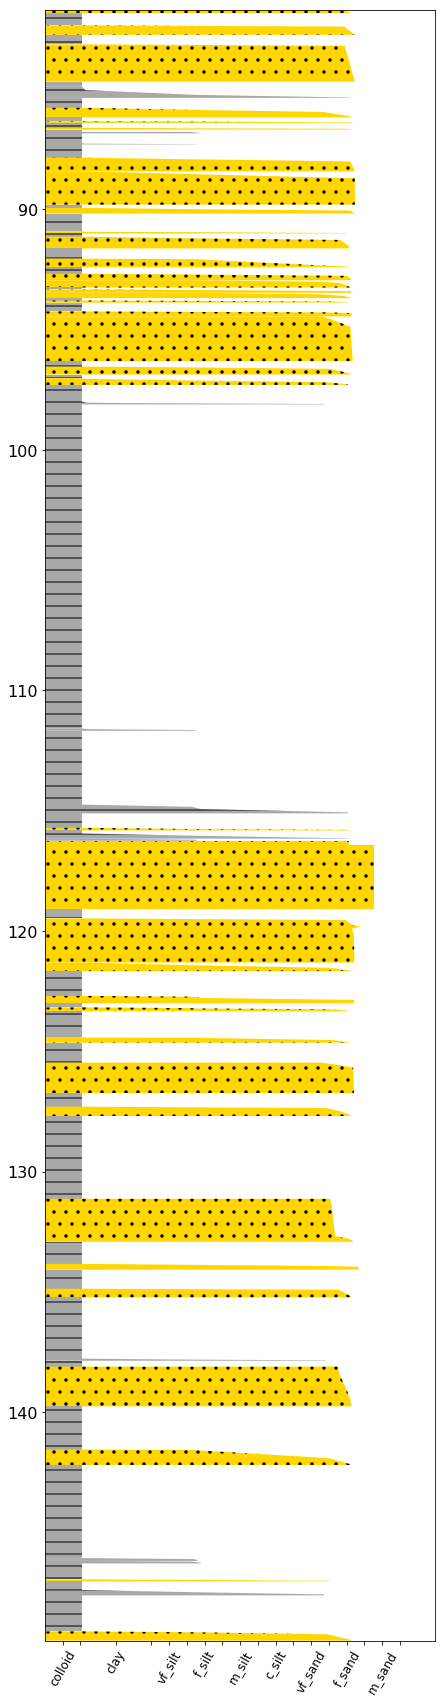

In [16]:
fig, ax = plt.subplots(figsize=(7,30))
bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax)

/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


OverflowError: cannot convert float infinity to integer

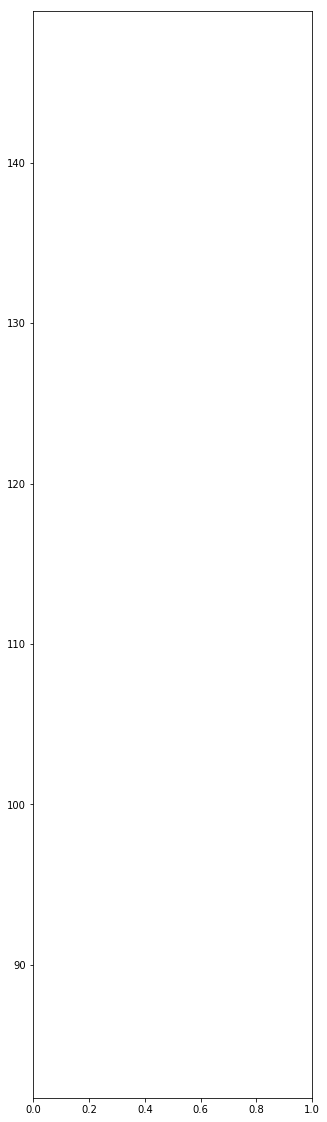

In [17]:
fig, ax = plt.subplots(figsize=(5,20))
bedseq.resample_data('depth_m', 0.1)

bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax)

In [ ]:
bedseq.min_field('grain_size_psi')

In [ ]:
np.log2(0.001)

In [ ]:
bedseq[4].values

In [ ]:
bedseq[4].as_patch(graphiclog.defaults.litholegend, width_field='grain_size_mm', depth_field='depth_m')

In [ ]:
graphiclog.defaults.litholegend.plot()

In [ ]:
b = graphiclog.Bed(top=1.0, base=0.0, data={'a' : 1, 'b' : [1,2,3]})

In [ ]:
b

In [ ]:
b.values

In [ ]:
xp = np.arange(5,10)
fp = np.random.rand(5)

x = np.arange(10)

np.interp(x, xp, fp, left=np.nan, right=np.nan)